In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [32]:
data1 = pd.read_csv(r'Hyderabad_House_Data.csv')
data1

,Unnamed: 0,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,2,1 BHK Builder Floor,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3,3 BHK Apartment,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur
...,...,...,...,...,...,...,...,...
1166,1166,2 BHK Apartment,1,Unfurnished,Family,900 sqft,"15,000",KPHB Road
1167,1167,1 BHK Apartment,1,Semi-Furnished,Bachelors/Family,East Facing Property,"10,000","Miyapur, NH"
1168,1168,3 BHK Apartment,1,Unfurnished,Bachelors,1515 sqft,"14,000","Pragathi Nagar, Kukatpally"
1169,1169,3 BHK Apartment,From Nov '19,Family,3,1500 sqft,"16,000","Habsiguda, NH"


In [33]:
data1.describe()

,Unnamed: 0
count,1171.000000
mean,585.000000
std,338.182889
min,0.000000
25%,292.500000
50%,585.000000
75%,877.500000
max,1170.000000


In [34]:
data1['bhk'] = pd.to_numeric(data1['Bedrooms'].str.split().str[0],errors = 'coerce')
data1['area'] = pd.to_numeric(data1['Area'].str.split().str[0],errors = 'coerce')
data1

,Unnamed: 0,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality,bhk,area
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda",3.0,1800.0
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road",3.0,2500.0
2,2,1 BHK Builder Floor,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli,1.0,NaN
3,3,3 BHK Apartment,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH",3.0,2160.0
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur,3.0,1580.0
...,...,...,...,...,...,...,...,...,...,...
1166,1166,2 BHK Apartment,1,Unfurnished,Family,900 sqft,"15,000",KPHB Road,2.0,900.0
1167,1167,1 BHK Apartment,1,Semi-Furnished,Bachelors/Family,East Facing Property,"10,000","Miyapur, NH",1.0,NaN
1168,1168,3 BHK Apartment,1,Unfurnished,Bachelors,1515 sqft,"14,000","Pragathi Nagar, Kukatpally",3.0,1515.0
1169,1169,3 BHK Apartment,From Nov '19,Family,3,1500 sqft,"16,000","Habsiguda, NH",3.0,1500.0


In [35]:
data2 = data1.drop(['Unnamed: 0','Bedrooms','Area'],axis = 1)
data2

,Bathrooms,Furnishing,Tennants,Price,Locality,bhk,area
0,2,Furnished,Bachelors/Family,"34,000","Bhagyalaxmi Nagar, Kavadiguda",3.0,1800.0
1,2,Semi-Furnished,Family,"45,000","Gachibowli, Outer Ring Road",3.0,2500.0
2,Immediately,Furnished,Bachelors/Family,"18,000",Gachibowli,1.0,NaN
3,Immediately,Furnished,Bachelors/Family,"40,000","Moosapet, NH",3.0,2160.0
4,2,Semi-Furnished,Family,"23,000",Raghavendra Colony kondapur,3.0,1580.0
...,...,...,...,...,...,...,...
1166,1,Unfurnished,Family,"15,000",KPHB Road,2.0,900.0
1167,1,Semi-Furnished,Bachelors/Family,"10,000","Miyapur, NH",1.0,NaN
1168,1,Unfurnished,Bachelors,"14,000","Pragathi Nagar, Kukatpally",3.0,1515.0
1169,From Nov '19,Family,3,"16,000","Habsiguda, NH",3.0,1500.0


In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bathrooms   1150 non-null   object 
 1   Furnishing  1171 non-null   object 
 2   Tennants    1170 non-null   object 
 3   Price       1171 non-null   object 
 4   Locality    1171 non-null   object 
 5   bhk         1157 non-null   float64
 6   area        1035 non-null   float64
dtypes: float64(2), object(5)
memory usage: 64.2+ KB


In [37]:
data2['Price'] = data2['Price'].str.replace(',','').astype(float)
data2

,Bathrooms,Furnishing,Tennants,Price,Locality,bhk,area
0,2,Furnished,Bachelors/Family,34000.0,"Bhagyalaxmi Nagar, Kavadiguda",3.0,1800.0
1,2,Semi-Furnished,Family,45000.0,"Gachibowli, Outer Ring Road",3.0,2500.0
2,Immediately,Furnished,Bachelors/Family,18000.0,Gachibowli,1.0,NaN
3,Immediately,Furnished,Bachelors/Family,40000.0,"Moosapet, NH",3.0,2160.0
4,2,Semi-Furnished,Family,23000.0,Raghavendra Colony kondapur,3.0,1580.0
...,...,...,...,...,...,...,...
1166,1,Unfurnished,Family,15000.0,KPHB Road,2.0,900.0
1167,1,Semi-Furnished,Bachelors/Family,10000.0,"Miyapur, NH",1.0,NaN
1168,1,Unfurnished,Bachelors,14000.0,"Pragathi Nagar, Kukatpally",3.0,1515.0
1169,From Nov '19,Family,3,16000.0,"Habsiguda, NH",3.0,1500.0


In [38]:
data2.isnull().sum()

Bathrooms      21
Furnishing      0
Tennants        1
Price           0
Locality        0
bhk            14
area          136
dtype: int64

In [39]:
data2['bhk'].fillna(data2['bhk'].median(), inplace=True)
data2['area'].fillna(data2['area'].median(), inplace=True)

In [40]:
data2.fillna(method='ffill', inplace=True)
data2

,Bathrooms,Furnishing,Tennants,Price,Locality,bhk,area
0,2,Furnished,Bachelors/Family,34000.0,"Bhagyalaxmi Nagar, Kavadiguda",3.0,1800.0
1,2,Semi-Furnished,Family,45000.0,"Gachibowli, Outer Ring Road",3.0,2500.0
2,Immediately,Furnished,Bachelors/Family,18000.0,Gachibowli,1.0,1400.0
3,Immediately,Furnished,Bachelors/Family,40000.0,"Moosapet, NH",3.0,2160.0
4,2,Semi-Furnished,Family,23000.0,Raghavendra Colony kondapur,3.0,1580.0
...,...,...,...,...,...,...,...
1166,1,Unfurnished,Family,15000.0,KPHB Road,2.0,900.0
1167,1,Semi-Furnished,Bachelors/Family,10000.0,"Miyapur, NH",1.0,1400.0
1168,1,Unfurnished,Bachelors,14000.0,"Pragathi Nagar, Kukatpally",3.0,1515.0
1169,From Nov '19,Family,3,16000.0,"Habsiguda, NH",3.0,1500.0


In [41]:
data2.isnull().sum()

Bathrooms     0
Furnishing    0
Tennants      0
Price         0
Locality      0
bhk           0
area          0
dtype: int64

In [42]:
data2['Bathrooms'].unique()

array(['2', 'Immediately', '1', '3', 'North', 'East', 'West',
       'Garden/Park', 'Main Road', '4', 'North - East', "From Nov '19",
       '1 Covered', '5', "From Oct '19", 'North - West',
       '\t\t\t\t\t\t\tImmediately\t\t\t            ', 'South',
       'Same Premise', 'Garden/Park, Main Road',
       '\t\t\t            \t\t\t\t            \t\t\t\t\t            \t\t\tSame Premise\t\t\t            \t\t\t\t\t            \t\t\t\t\t            \t\t\t\t            '],
      dtype=object)

In [43]:
data2['Bathrooms'] = pd.to_numeric(data2['Bathrooms'], errors='coerce')
data2.dropna(subset=['Bathrooms'], inplace=True)
data2['Bathrooms'] = data2['Bathrooms'].astype(int)
data2.isnull().sum()

Bathrooms     0
Furnishing    0
Tennants      0
Price         0
Locality      0
bhk           0
area          0
dtype: int64

In [44]:
data2

,Bathrooms,Furnishing,Tennants,Price,Locality,bhk,area
0,2,Furnished,Bachelors/Family,34000.0,"Bhagyalaxmi Nagar, Kavadiguda",3.0,1800.0
1,2,Semi-Furnished,Family,45000.0,"Gachibowli, Outer Ring Road",3.0,2500.0
4,2,Semi-Furnished,Family,23000.0,Raghavendra Colony kondapur,3.0,1580.0
5,2,Furnished,Bachelors/Family,50000.0,"Banjara Darwaja, Golconda Fort",3.0,2600.0
6,1,Semi-Furnished,Bachelors/Family,32000.0,"Mohans Sai Signature, Nanakramguda",3.0,1350.0
...,...,...,...,...,...,...,...
1165,1,Unfurnished,Bachelors/Family,10500.0,"Lingampally-Serilingampally, NH",1.0,1400.0
1166,1,Unfurnished,Family,15000.0,KPHB Road,2.0,900.0
1167,1,Semi-Furnished,Bachelors/Family,10000.0,"Miyapur, NH",1.0,1400.0
1168,1,Unfurnished,Bachelors,14000.0,"Pragathi Nagar, Kukatpally",3.0,1515.0


In [45]:
numerical_features = ['bhk','area','Bathrooms','Price']
categorical_features = ['Furnishing','Tennants','Locality']

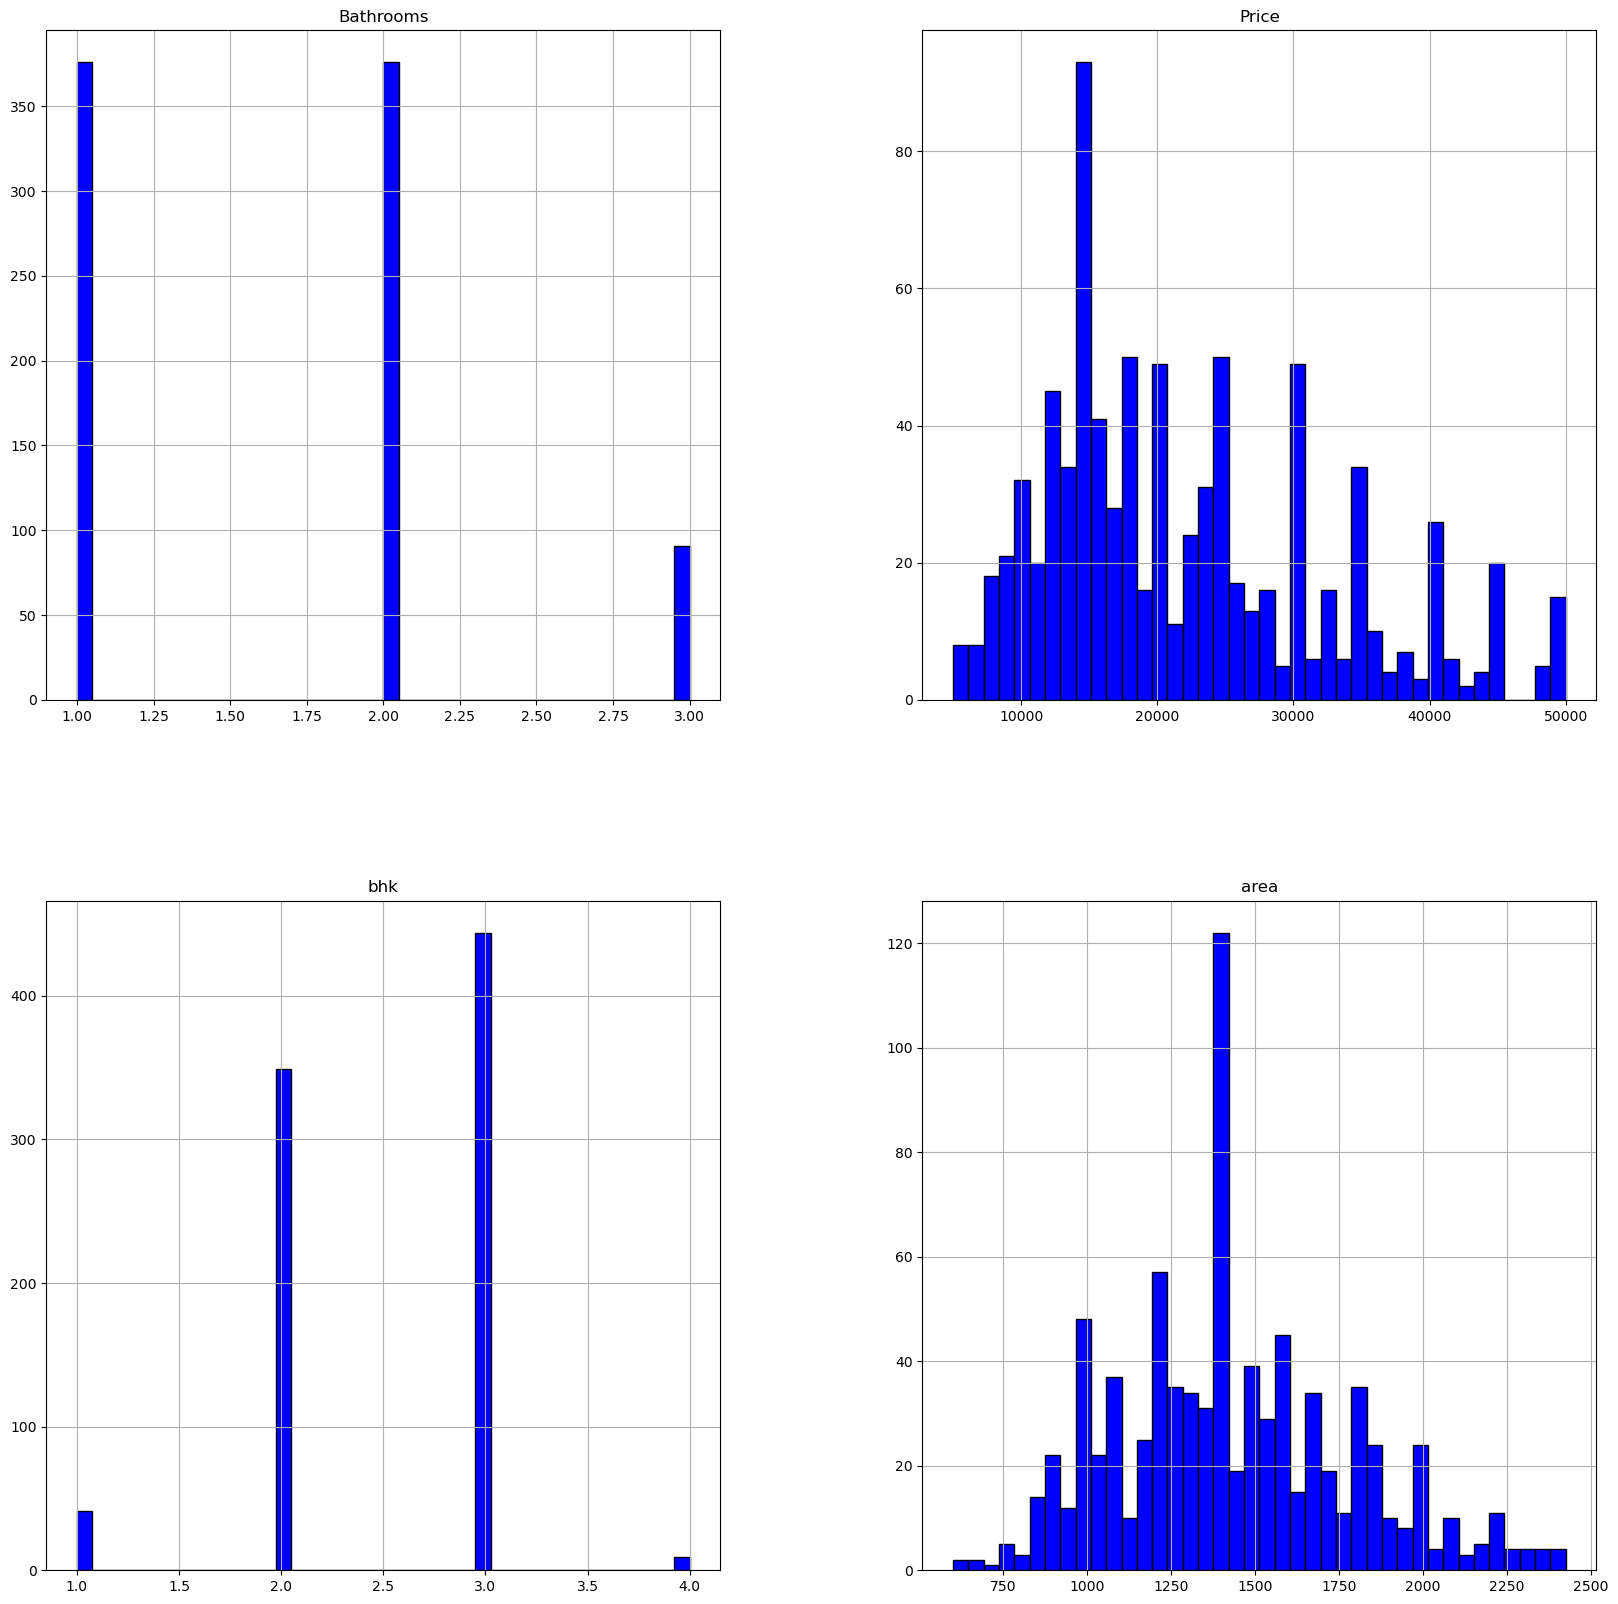

In [46]:
q1 = data2[numerical_features].quantile(0.25)
q3 = data2[numerical_features].quantile(0.75)
iqr = q3 - q1  
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = (data2[numerical_features] < lower_bound) | (data2[numerical_features] > upper_bound)
data_no_outliers = data2[~outliers.any(axis=1)]
data_no_outliers.hist(bins=40, figsize=(20, 20), color='blue', edgecolor='black')
plt.show()

In [47]:
df = data_no_outliers

In [48]:
df['price_per_sqft'] = df['Price'] / df['area']
df.head()

C:\Users\Nithin\AppData\Local\Temp\ipykernel_2708\466941484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = df['Price'] / df['area']


,Bathrooms,Furnishing,Tennants,Price,Locality,bhk,area,price_per_sqft
0,2,Furnished,Bachelors/Family,34000.0,"Bhagyalaxmi Nagar, Kavadiguda",3.0,1800.0,18.888889
4,2,Semi-Furnished,Family,23000.0,Raghavendra Colony kondapur,3.0,1580.0,14.556962
6,1,Semi-Furnished,Bachelors/Family,32000.0,"Mohans Sai Signature, Nanakramguda",3.0,1350.0,23.703704
7,1,Furnished,Bachelors/Family,13000.0,Gowlidoddy,3.0,1400.0,9.285714
8,2,Furnished,Bachelors/Family,35000.0,"Somajiguda, NH",3.0,1700.0,20.588235


In [49]:
df1 = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df1

,Bathrooms,Price,bhk,area,price_per_sqft,Furnishing_Furnished,Furnishing_Immediately,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Tennants_3,...,Locality_ West,Locality_ West Marredpally,"Locality_ Western Exotica Project , Kothaguda",Locality_ Whitefields,"Locality_ YMCA Circle, Narayanguda","Locality_ Yella Reddy Guda, NH","Locality_ Yousufguda, NH",Locality_ hydernagar,Locality_ khairtabad,Locality_ military dairy farm rd
0,2,34000.0,3.0,1800.0,18.888889,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,23000.0,3.0,1580.0,14.556962,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1,32000.0,3.0,1350.0,23.703704,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1,13000.0,3.0,1400.0,9.285714,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2,35000.0,3.0,1700.0,20.588235,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,1,10500.0,1.0,1400.0,7.500000,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1166,1,15000.0,2.0,900.0,16.666667,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1167,1,10000.0,1.0,1400.0,7.142857,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1168,1,14000.0,3.0,1515.0,9.240924,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df1.describe()

,Bathrooms,Price,bhk,area,price_per_sqft
count,843.000000,843.000000,843.000000,843.000000,843.000000
mean,1.661922,22125.682088,2.499407,1431.386714,15.397080
std,0.663475,10478.935804,0.607504,347.959870,6.092430
min,1.000000,5000.000000,1.000000,600.000000,3.571429
25%,1.000000,14750.000000,2.000000,1200.000000,10.830679
50%,2.000000,20000.000000,3.000000,1400.000000,14.545455
75%,2.000000,30000.000000,3.000000,1650.000000,18.845727
max,3.000000,50000.000000,4.000000,2425.000000,41.984733


In [51]:
X = df1.drop(columns=['Price'])  
y = df1['Price']

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [65]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f'Random Forest R-squared: {r2_score(y_test, y_pred_rf)}')
print(f'mean squared error:',mean_squared_error(y_test,y_pred_rf))

Random Forest R-squared: 0.9949517976260907
mean squared error: 568527.3565088757


C:\Users\Nithin\AppData\Local\Temp\ipykernel_2708\991706452.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Fit Line')


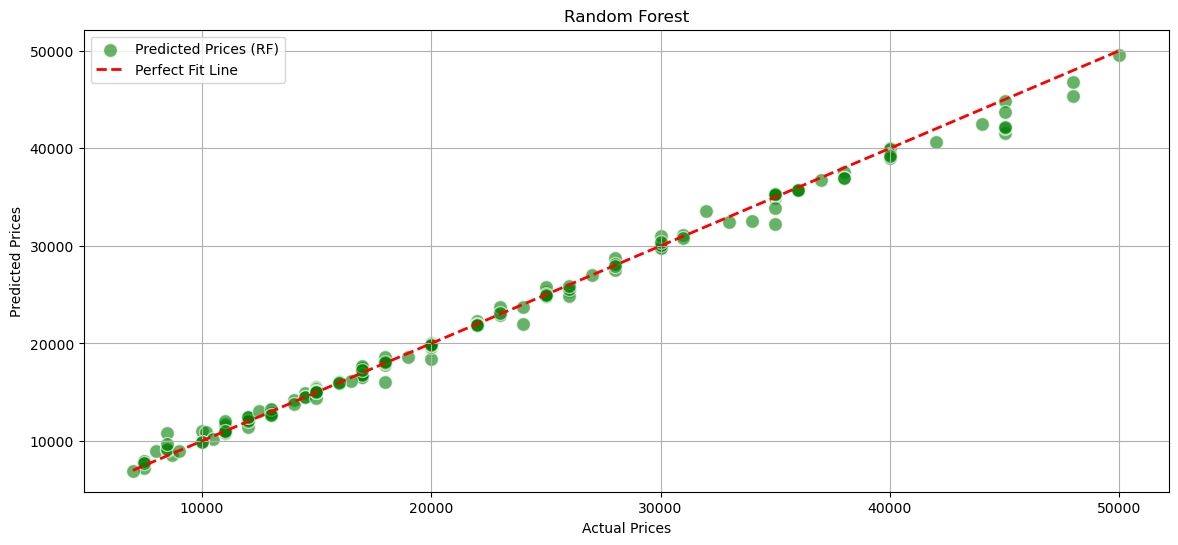

In [66]:
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, edgecolors='w', s=100, label='Predicted Prices (RF)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Fit Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest')
plt.legend()
plt.grid(True)
plt.show()